   Egitim Seviyesi
0                1
1                2
2                3
3                4
4                5
5                6
6                7
7                8
8                9
9               10
    maas
0   2250
1   2500
2   3000
3   4000
4   5500
5   7500
6  10000
7  15000
8  25000
9  50000


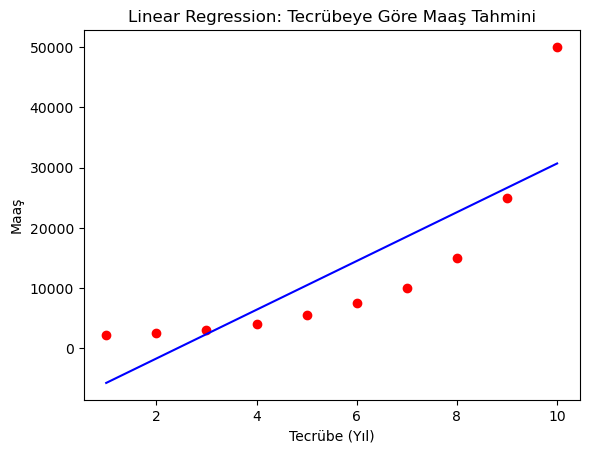

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


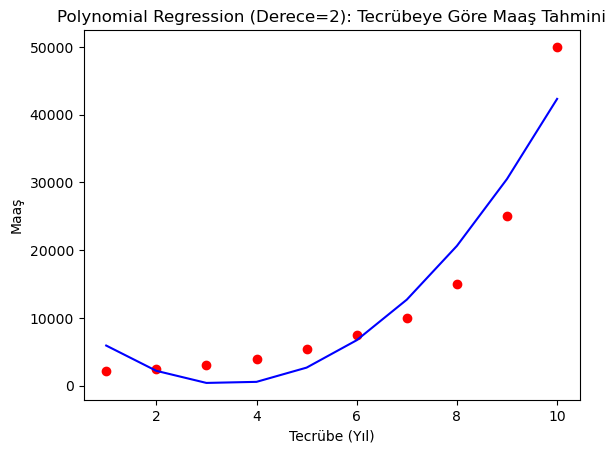

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


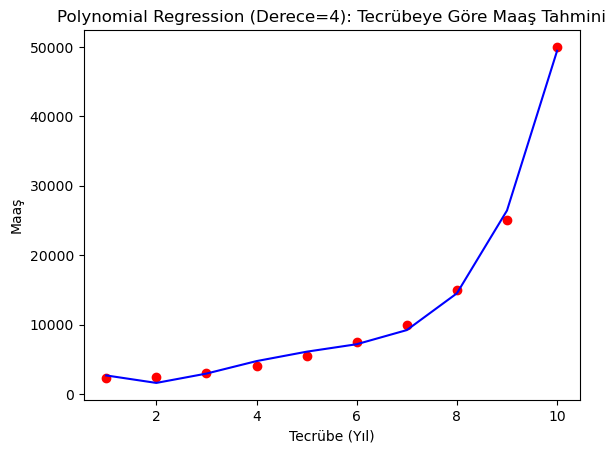

Polynomial R2 değeri: 0.9973922891706615


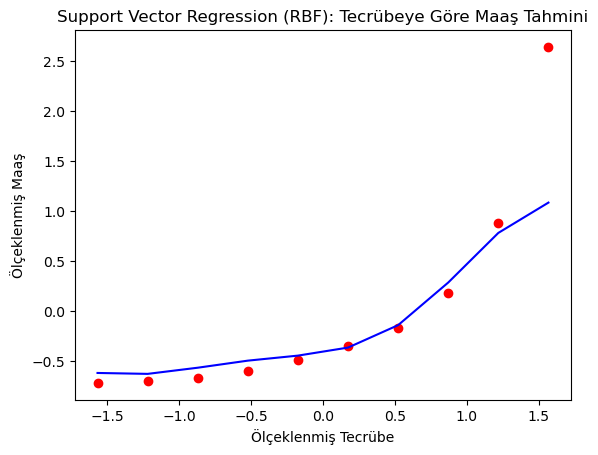

Support Vector Regression R2 değeri: 0.7513836788854973
Bağımsız Değişken X değerleri:
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
Bağımsız Değişken Z değerleri:
 [[ 1.5]
 [ 2.5]
 [ 3.5]
 [ 4.5]
 [ 5.5]
 [ 6.5]
 [ 7.5]
 [ 8.5]
 [ 9.5]
 [10.5]]
Bağımsız Değişken K değerleri:
 [[0.6]
 [1.6]
 [2.6]
 [3.6]
 [4.6]
 [5.6]
 [6.6]
 [7.6]
 [8.6]
 [9.6]]


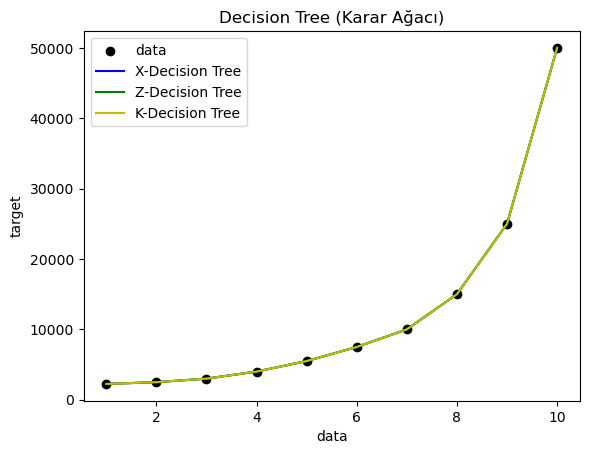

Decision Tree - 6.6 yıllık tecrübeye sahip birinin maaşı: [10000.]
Decision Tree - 11 yıllık tecrübeye sahip birinin maaşı: [50000.]
Decision Tree R2 değeri: 1.0


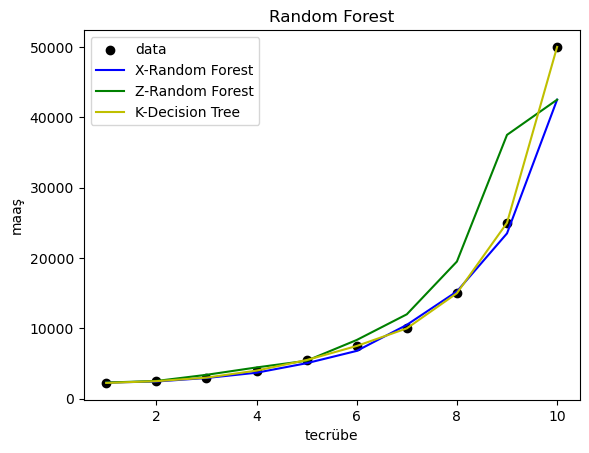

Random Forest - 6.6 yıllık tecrübeye sahip birinin maaş tahmini:[10500.]
Random Forest - 11 yıllık tecrübeye sahip birinin maaş tahmini:[42500.]
Random Forest X R2 değeri: 0.9704434230386582
Random Forest Z R2 değeri: 0.8820523231127324
Random Forest K R2 değeri: 0.9704434230386582


In [1]:
# MODEL KURULUM - GRAFİK - TAHMİN
# 1. Kütüphaneler
import numpy as np # matematiksel işlemler
import matplotlib.pyplot as plt # grafik çizimi
import pandas as pd # verileri CSV'den çekme ve DataFrame olarak işleme
from sklearn.metrics import r2_score

# 2. Veri Yükleme
veriler = pd.read_csv('maaslar.csv')

# X = Bağımsız Değişken (Tecrübe), Y = Bağımlı Değişken (Maaş)
# x ve y DataFrame
x = veriler.iloc[:,1:2] # Tecrübe sütunu
y = veriler.iloc[:,2:] # Maaş sütunu
# X ve Y NumPy Array
X = x.values 
Y = y.values

print(x)
print(y)

# 3. Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y) # Modeli veriye fit et (eğit)

plt.scatter(X,Y,color='red') # Gerçek veriyi çiz
plt.plot(x,lin_reg.predict(X), color = 'blue') # Modelin tahmin ettiği çizgiyi çiz
plt.title("Linear Regression: Tecrübeye Göre Maaş Tahmini")
plt.xlabel("Tecrübe (Yıl)")
plt.ylabel("Maaş")
plt.show()

# 4. Polynomial Regression (degree=2) 
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2) # 2. Dereceden Polinom Eğri
x_poly = poly_reg.fit_transform(X) # X verisini polinom hale çevir.
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y) # Polinom modele fit et.
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title("Polynomial Regression (Derece=2): Tecrübeye Göre Maaş Tahmini")
plt.xlabel("Tecrübe (Yıl)")
plt.ylabel("Maaş")
plt.show()

# 5. Polynomial Regression (degree = 4)
from sklearn.preprocessing import PolynomialFeatures # 4. Dereceden polinom
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(X)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title("Polynomial Regression (Derece=4): Tecrübeye Göre Maaş Tahmini")
plt.xlabel("Tecrübe (Yıl)")
plt.ylabel("Maaş")
plt.show()
# R2 Değeri Polynomial Regression (degree = 4)
print(f"Polynomial R2 değeri: {r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X)))}")

# 6. SVR - Support Vector Regression
# Not: SVR mesafe bazlı çalıştığı için verilerin ölçeklenmesi gerekir. Veriler aynı ölçekte olmazsa anlamlı tahminler yapamaz.
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
x_olcekli = sc1.fit_transform(X) # X verisini scale et

sc2=StandardScaler()
y_olcekli = np.ravel(sc2.fit_transform(Y.reshape(-1,1))) # Y verisini scale et
# SVR Modeli Kur
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf') # RBF kernel = Esnek eğri
svr_reg.fit(x_olcekli,y_olcekli) # Modele fit et

plt.scatter(x_olcekli,y_olcekli,color='red')
plt.plot(x_olcekli,svr_reg.predict(x_olcekli),color='blue')
plt.title("Support Vector Regression (RBF): Tecrübeye Göre Maaş Tahmini")
plt.xlabel("Ölçeklenmiş Tecrübe")
plt.ylabel("Ölçeklenmiş Maaş")
plt.show()
# SVR R2
print(f"Support Vector Regression R2 değeri: {r2_score(y_olcekli, svr_reg.predict(x_olcekli))}")

# 7.🌳 Decision Tree Regressor
"""
- Bu model basamak basamak (stepwise) tahmin yapar
- Örn: 6.1 yıl, 6.2 yıl ve 6.3 yıl gibi değerlerin hepsine aynı tahmini verebilir.
"""
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)

# Tahmin 
"""
- Z ve K, verinin biraz sağından ve solundan alınarak "karar sınırlarını" göstermek için kullanılır. 
- Bu çizgiler sayesinde Decision Tree'nin "basamaklı" yapısı net görünür.
"""
print(f"Bağımsız Değişken X değerleri:\n {X}")
Z = X + 0.5
print(f"Bağımsız Değişken Z değerleri:\n {Z}")
K = X - 0.4
print(f"Bağımsız Değişken K değerleri:\n {K}")
# Grafik
plt.scatter(X,Y,c='k', label='data') # Gerçek veriler
plt.plot(X, r_dt.predict(X), c='b', label='X-Decision Tree')
plt.plot(X, r_dt.predict(Z), c='g', label='Z-Decision Tree')
plt.plot(X, r_dt.predict(K), c='y', label='K-Decision Tree')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree (Karar Ağacı)')
plt.legend()
plt.show()
print(f"Decision Tree - 6.6 yıllık tecrübeye sahip birinin maaşı: {r_dt.predict([[6.6]])}") #10.000
print(f"Decision Tree - 11 yıllık tecrübeye sahip birinin maaşı: {r_dt.predict([[11]])}") #50.000
# Decision Tree R2
print(f"Decision Tree R2 değeri: {r2_score(Y, r_dt.predict(X))}")

# 8. Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# n_estimators = çizilecek decision tree sayısı
rf_reg = RandomForestRegressor(n_estimators = 10, random_state=0)
rf_reg.fit(X,Y.ravel()) # Y.ravel(): 2D array olan Y'yi 1D'ye çeviriyor.
# Her ağaç kendi verisinden ve özelliklerinden öğrenir.
# Sonuçta ağaçların tahminleri ortalama alınarak final karar verilir.

# Grafik (Random Forest)
plt.scatter(X,Y,c='k', label='data') # Gerçek Veriler
plt.plot(X,rf_reg.predict(X),c='b', label='X-Random Forest') # RF tahmini
plt.plot(X,rf_reg.predict(Z),c='g', label='Z-Random Forest') # Sağa kaydırılmış veriye RF tahmini
plt.plot(X,r_dt.predict(K),c='y', label='K-Decision Tree') # Decision Tree tahmini, random forest'dan farklı olduğunu göstermek amacıyla eklendi.
plt.xlabel('tecrübe')
plt.ylabel('maaş')
plt.title("Random Forest")
plt.legend()
plt.show()
print(f"Random Forest - 6.6 yıllık tecrübeye sahip birinin maaş tahmini:{rf_reg.predict([[6.6]])}") # 10.500
print(f"Random Forest - 11 yıllık tecrübeye sahip birinin maaş tahmini:{rf_reg.predict([[11]])}") # 42.500

# r2_score(y_true, y_pred)
r2_random_forestX = r2_score(Y, rf_reg.predict(X))
r2_random_forestZ = r2_score(Y, rf_reg.predict(Z))
r2_random_forestK = r2_score(Y, rf_reg.predict(K))
print(f"Random Forest X R2 değeri: {r2_random_forestX}")
print(f"Random Forest Z R2 değeri: {r2_random_forestZ}")
print(f"Random Forest K R2 değeri: {r2_random_forestK}")